### ```moabb```을 통해 ```s*.mat``` 데이터 다운

In [1]:
import mne
import moabb
from moabb.datasets import Cho2017

source = Cho2017()

Tensorflow not install, you could not use those pipelines


In [2]:
# download s*.mat data using moabb
# for i in range(1, 53):  
    # source.data_path(i, "C:/Users/supli/Documents/Repo/MNE_tutorials/GIST_MI")

### ```s*.mat``` 데이터를 ```mne```가 인식할 수 있도록 가공


* ```s01.mat``` 예시
* ```scipy.io.loadmat()```을 통해 ```s*.mat``` 데이터를 변수로 저장
* data structure 파악을 위해 fields 출력

In [3]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

mat_file_name = "./GIST_MI/s01.mat"
mat_file = scipy.io.loadmat(mat_file_name)

print(type(mat_file))
for i in mat_file:
    print(i)
    
fields = list(mat_file['eeg'][0].dtype.fields.keys())
print("fields: ", fields)
mat_file['eeg'][0]['imagery_left'][0].shape

<class 'dict'>
__header__
__version__
__globals__
eeg
fields:  ['noise', 'rest', 'srate', 'movement_left', 'movement_right', 'movement_event', 'n_movement_trials', 'imagery_left', 'imagery_right', 'n_imagery_trials', 'frame', 'imagery_event', 'comment', 'subject', 'bad_trial_indices', 'psenloc', 'senloc']


(68, 358400)

* ```imagery_left``` 데이터를 ```Raw```로 변환
    * 68개의 채널중 1-64 채널은 EEG, 65- 68 채널은 EMG
    * ```sfreq```는 ```srate```를 따른다.

In [4]:
ch_names = []
ch_types = []

for i in range(1, len(mat_file['eeg'][0]['imagery_left'][0])-3):
    ch_names.append('eeg' + str(i))
    ch_types.append('eeg')

In [5]:
# imagery_left
info = mne.create_info(ch_names=ch_names, sfreq=512, ch_types=ch_types)
raw = mne.io.RawArray(mat_file['eeg'][0]['imagery_left'][0][0:64, :], info=info)

raw.info

Creating RawArray with float64 data, n_channels=64, n_times=358400
    Range : 0 ... 358399 =      0.000 ...   699.998 secs
Ready.


<Info | 7 non-empty values
 bads: []
 ch_names: eeg1, eeg2, eeg3, eeg4, eeg5, eeg6, eeg7, eeg8, eeg9, eeg10, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 512.0 Hz
>

* ```imagery_right``` 데이터를 ```Raw```로 변환

Creating RawArray with float64 data, n_channels=64, n_times=5000
    Range : 0 ... 4999 =      0.000 ...     4.999 secs
Ready.
Using matplotlib as 2D backend.


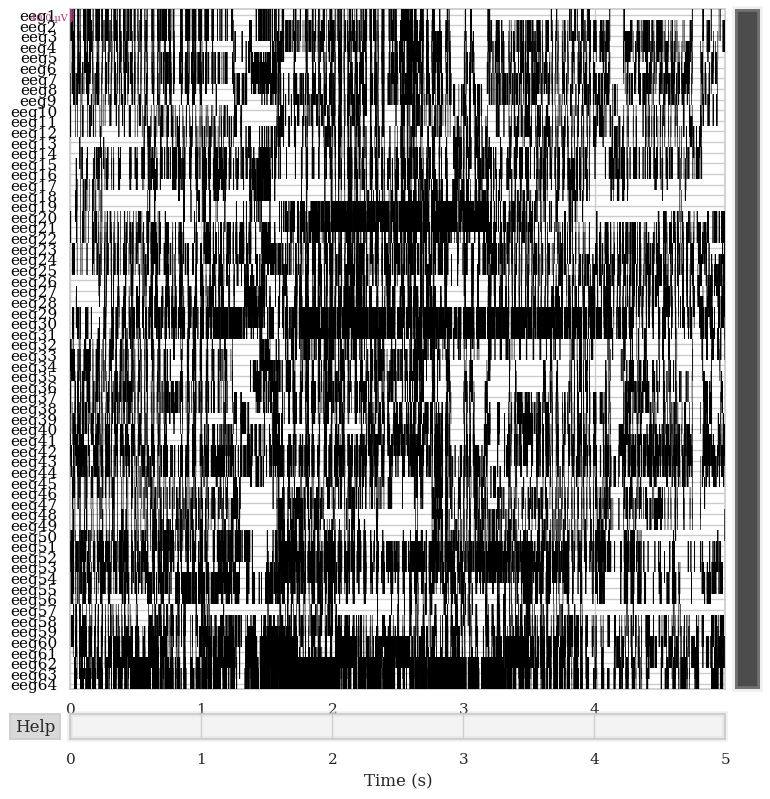

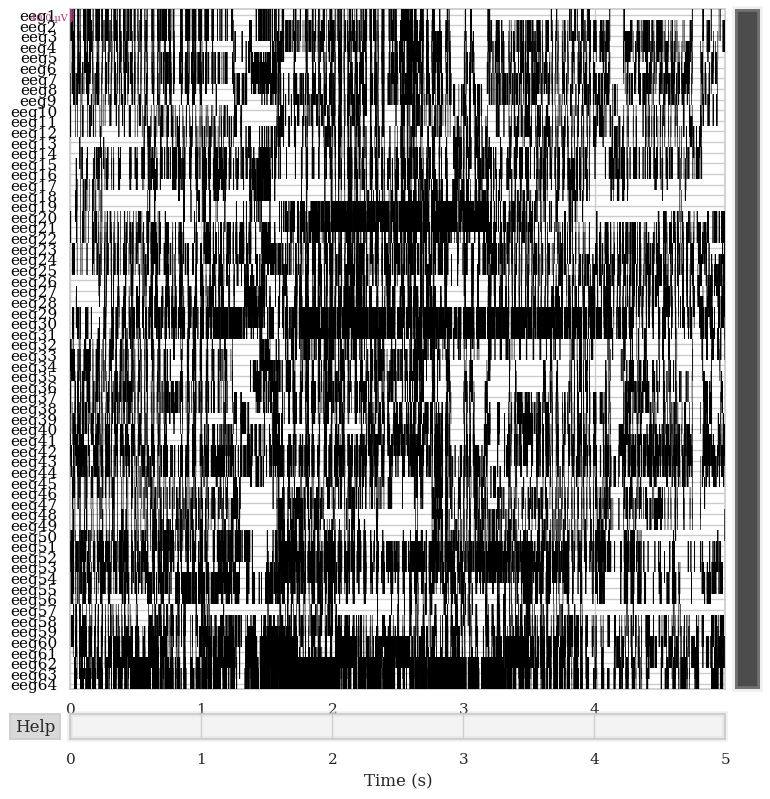

In [6]:
# imagery_right
info = mne.create_info(ch_names=ch_names, sfreq=1000, ch_types=ch_types)
raw = mne.io.RawArray(mat_file['eeg'][0]['imagery_right'][0][0:64, 0:5000], info=info)

raw.plot(n_channels=65)

* ```s1``` ~ ```s52``` 파일을 ```Raw```로 변환


In [7]:
# s*.mat 파일 주소 생성
subject_idx = []
subject_len = 53
for i in range(1, subject_len):
    subject_idx.append("./GIST_MI/s{:02}.mat".format(i))

# 각 파일을 열어 하나의 리스트에 저장
mat_file_list = []
for i in range(1, subject_len):
    mat_file_list.append(scipy.io.loadmat(subject_idx[i-1]))

In [8]:
result = np.vstack((mat_file_list[0]['eeg'][0]['imagery_left'][0], mat_file_list[0]['eeg'][0]['imagery_event'][0]))
result.shape

(69, 358400)

In [9]:
# info에 필요한 ch_names, ch_types, sfreq 생성
eeg_ch_names = [
            "Fp1", "AF7", "AF3", "F1", "F3", "F5", "F7", "FT7", "FC5", "FC3", "FC1",
            "C1", "C3", "C5", "T7", "TP7", "CP5", "CP3", "CP1", "P1", "P3", "P5", "P7",
            "P9", "PO7", "PO3", "O1", "Iz", "Oz", "POz", "Pz", "CPz", "Fpz", "Fp2",
            "AF8", "AF4", "AFz", "Fz", "F2", "F4", "F6", "F8", "FT8", "FC6", "FC4",
            "FC2", "FCz", "Cz", "C2", "C4", "C6", "T8", "TP8", "CP6", "CP4", "CP2",
            "P2", "P4", "P6", "P8", "P10", "PO8", "PO4", "O2",
]
emg_ch_names = ["EMG1", "EMG2", "EMG3", "EMG4"]
ch_names = eeg_ch_names + emg_ch_names + ["Stim"]
ch_types = ["eeg"] * 64 + ["emg"] * 4 + ["stim"]
sfreq = mat_file_list[0]['eeg'][0]['srate'][0][0]

for i in range(1, subject_len):
    left_mat = np.vstack((mat_file_list[i-1]['eeg'][0]['imagery_left'][0], mat_file_list[i-1]['eeg'][0]['imagery_event'][0]))
    right_mat = np.vstack((mat_file_list[i-1]['eeg'][0]['imagery_left'][0], mat_file_list[i-1]['eeg'][0]['imagery_event'][0]))

# 각 .mat 파일을 raw로 변환([i][0]: left, [i][1]: right)
raw_list = []
for i in range(1, subject_len):
    info = mne.create_info(ch_names=ch_names, sfreq=sfreq ,ch_types=ch_types)
    left = mne.io.RawArray(left_mat, info=info)
    right = mne.io.RawArray(right_mat, info=info)
    raw_list.append([left, right])

Creating RawArray with float64 data, n_channels=69, n_times=358400
    Range : 0 ... 358399 =      0.000 ...   699.998 secs
Ready.
Creating RawArray with float64 data, n_channels=69, n_times=358400
    Range : 0 ... 358399 =      0.000 ...   699.998 secs
Ready.
Creating RawArray with float64 data, n_channels=69, n_times=358400
    Range : 0 ... 358399 =      0.000 ...   699.998 secs
Ready.
Creating RawArray with float64 data, n_channels=69, n_times=358400
    Range : 0 ... 358399 =      0.000 ...   699.998 secs
Ready.
Creating RawArray with float64 data, n_channels=69, n_times=358400
    Range : 0 ... 358399 =      0.000 ...   699.998 secs
Ready.
Creating RawArray with float64 data, n_channels=69, n_times=358400
    Range : 0 ... 358399 =      0.000 ...   699.998 secs
Ready.
Creating RawArray with float64 data, n_channels=69, n_times=358400
    Range : 0 ... 358399 =      0.000 ...   699.998 secs
Ready.
Creating RawArray with float64 data, n_channels=69, n_times=358400
    Range : 0 ..

The number of subjects:  52
s01's imagery_left info: <Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 64 EEG, 4 EMG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: unspecified
 nchan: 69
 projs: []
 sfreq: 512.0 Hz
>
s01's imagery_right info: <Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 64 EEG, 4 EMG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: unspecified
 nchan: 69
 projs: []
 sfreq: 512.0 Hz
>


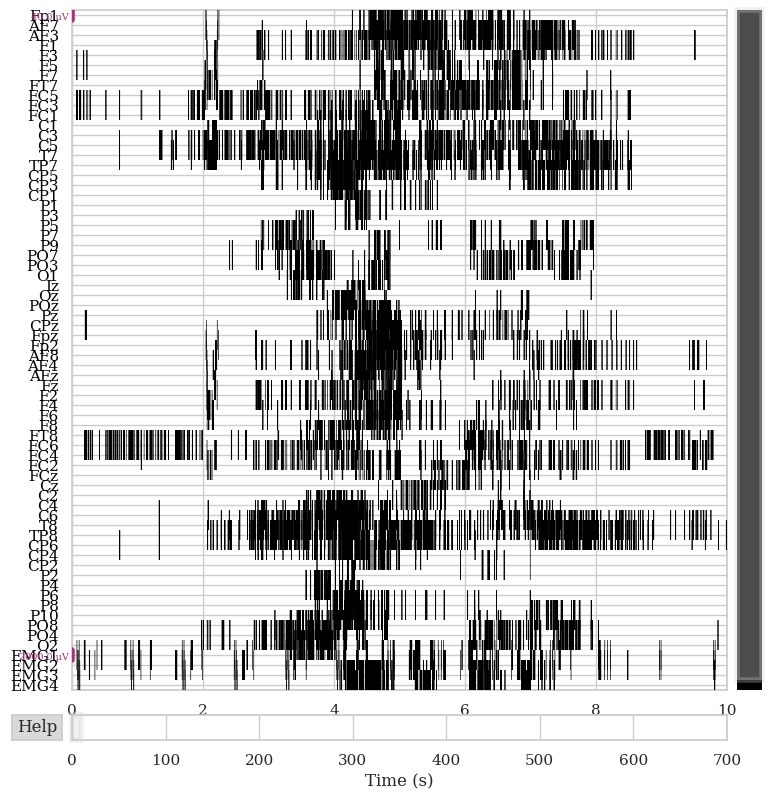

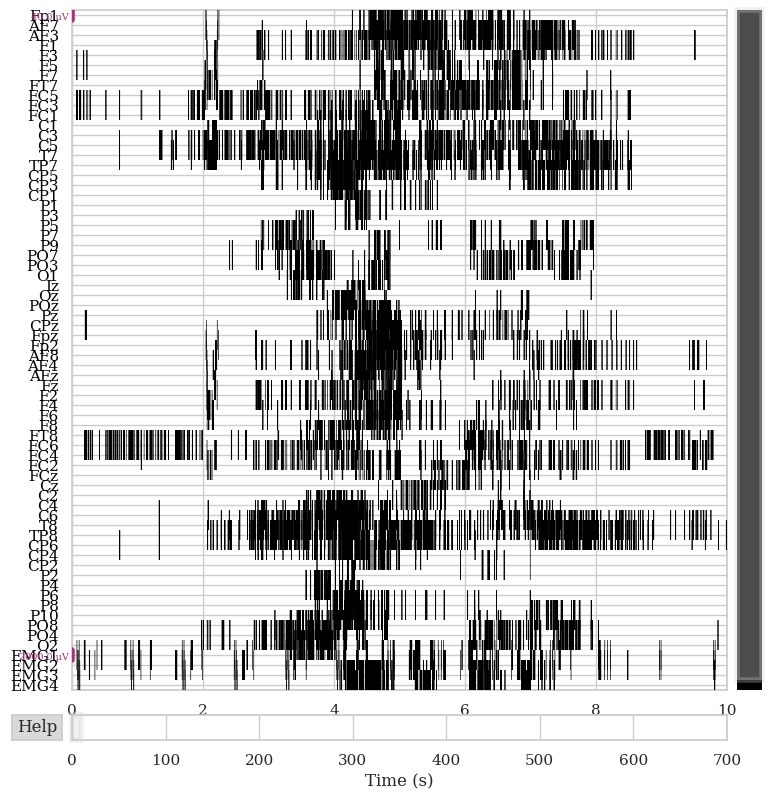

In [10]:
print("The number of subjects: ", len(raw_list))
print("s{:02}'s imagery_left info:".format(1), raw_list[0][0].info)
print("s{:02}'s imagery_right info:".format(1), raw_list[0][0].info)
raw_list[0][0].plot(n_channels=-1)

# ERD (Event Related Desynchronization)   
: 운동을 수행할 때 관련된 뇌파 주파수 대역의 활동이 줄어들거나 억제되는 현상

### Rereferencing

: 각 전극의 신호에 대한 참조를 변경

In [14]:
for i in range(1, subject_len):
    print(len(raw_list[i-1][0]), len(raw_list[i-1][1]))

358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400
358400 358400


In [17]:
LEFT = 0
RIGHT = 1

# 각 참가자의 EEG를 기본 참조를 기준으로 rereferencing(CAR)
referenced_raw_list = []
for i in range(1, subject_len):
    referenced_raw_list.append([mne.set_eeg_reference(raw_list[i-1][LEFT])[0], mne.set_eeg_reference(raw_list[i-1][RIGHT])[0]])

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
E

MemoryError: Unable to allocate 175. MiB for an array with shape (64, 358400) and data type float64

<table>
  <tr>
    <td><img src="./img/Practice with MI data/before_rereference.png" width=400 /></td><td><img src="./img/Practice with MI data/after_rereference.png" width=400 /></td>
  <tr>
</table>

In [11]:
# s1 예시

# 상수 정의
LEFT = 0
RIGHT = 1

# s1의 Raw info 출력
print("Info of S1's Left MI:\n", raw_list[0][LEFT].info)
print("\nInfo of S1's Right MI:\n", raw_list[0][RIGHT].info)

Info of S1's Left MI:
 <Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 64 EEG, 4 EMG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: unspecified
 nchan: 69
 projs: []
 sfreq: 512.0 Hz
>

Info of S1's Right MI:
 <Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 64 EEG, 4 EMG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: unspecified
 nchan: 69
 projs: []
 sfreq: 512.0 Hz
>


Plot S1's Left MI:



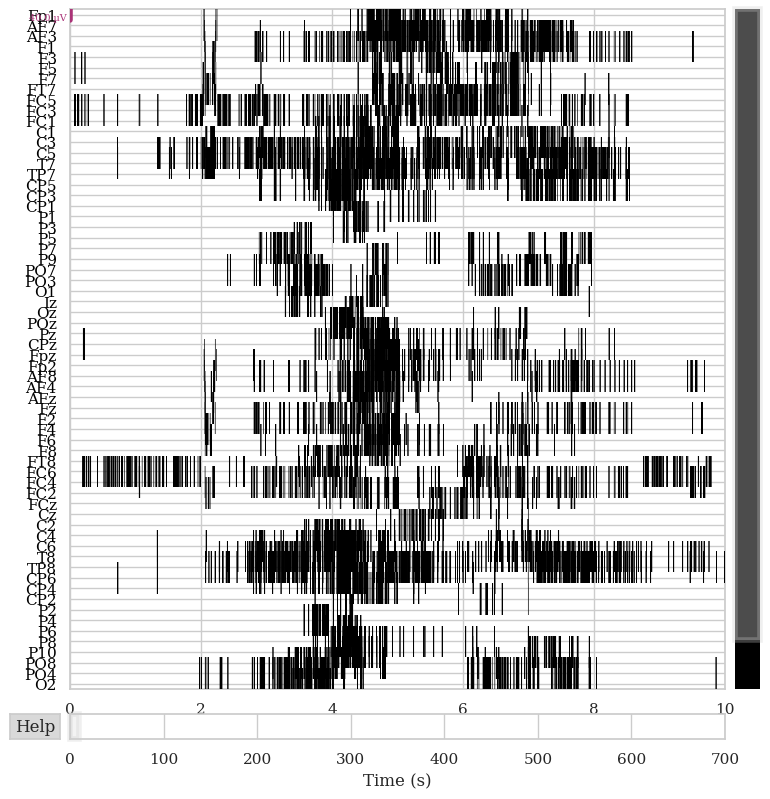

Figure(800x800)
Plot S1's Right MI:



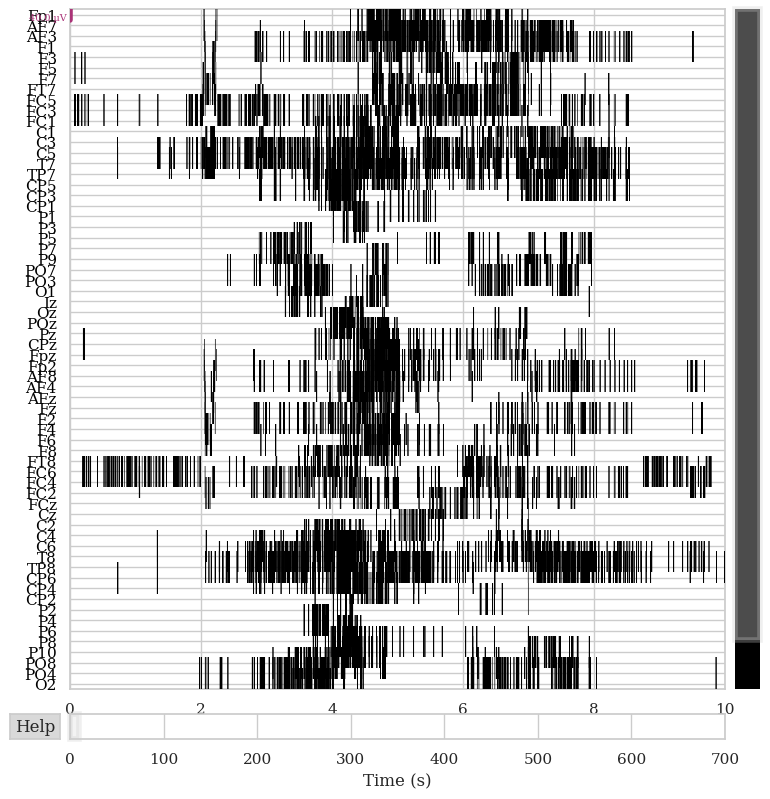

Figure(800x800)


In [13]:
# plot으로 출력
print("Plot S1's Left MI:\n")
print(raw_list[0][LEFT].plot(n_channels=64))
print("Plot S1's Right MI:\n")
print(raw_list[0][RIGHT].plot(n_channels=64))

In [12]:
s1_raw = [raw_list[0][LEFT].copy(), raw_list[0][RIGHT].copy()] 

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


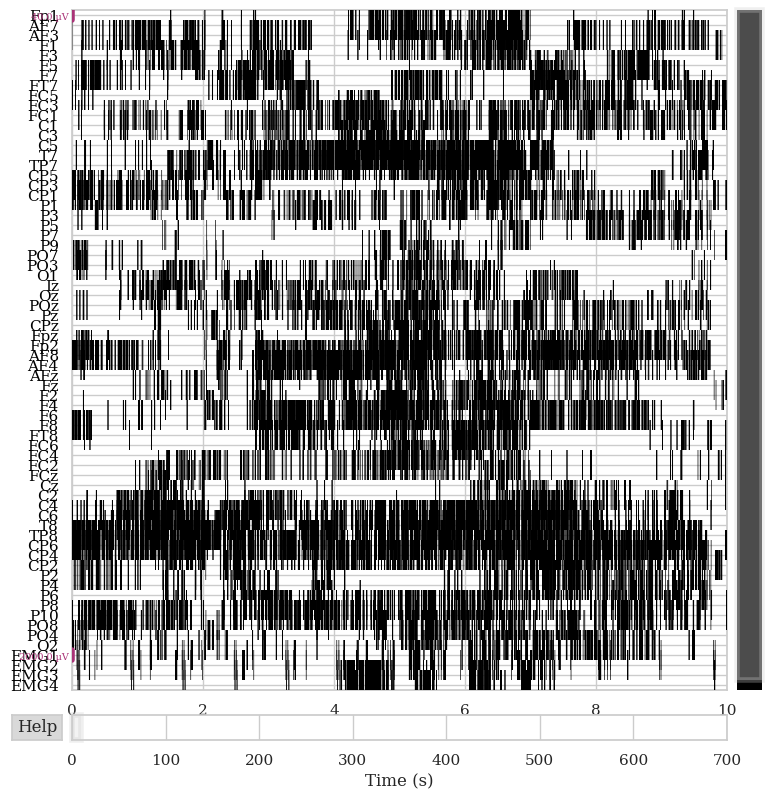

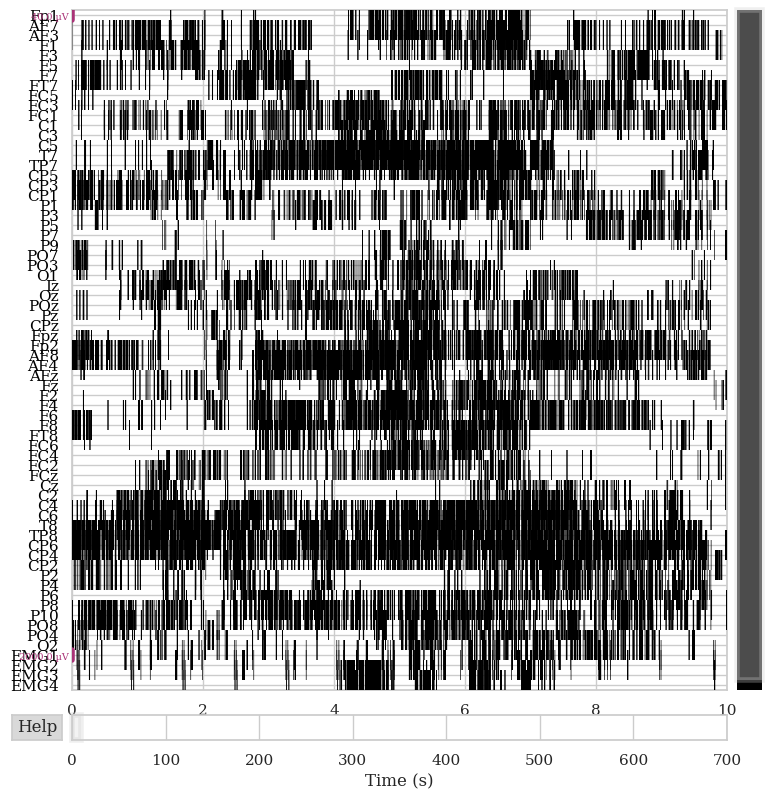

In [16]:
# 기본 참조로 rereferencing (CAR)
s1_referenced_raw_left = mne.set_eeg_reference(s1_raw[LEFT], copy=True)

s1_referenced_raw_left[0].plot(n_channels=-1)

* -2s ~ 5s (0s ~ 7s) epoching   
epcohing: 연속된 데이터를 더 작은 구간으로 나눈다.

In [ ]:
s1_events_left = mne.find_events(s1_raw[LEFT], stim_channel='eeg49', min_duration=0.01, initial_event=True)

1 events found
Event IDs: [104293]


Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1 events and 3585 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 3585 original time points ...


C:\Users\supli\AppData\Local\Temp\ipykernel_113424\53342456.py:3: FutureWarning: The current default events=None is deprecated and will change to events=True in MNE 1.6. Set events=False to suppress this warning.
  s1_epoch_left.plot(n_channels=-1)


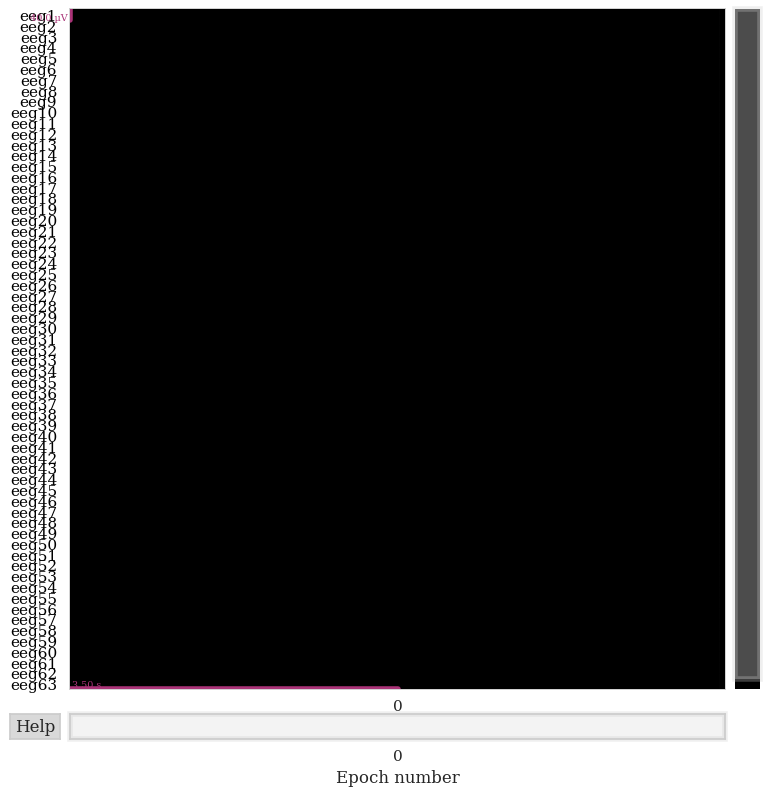

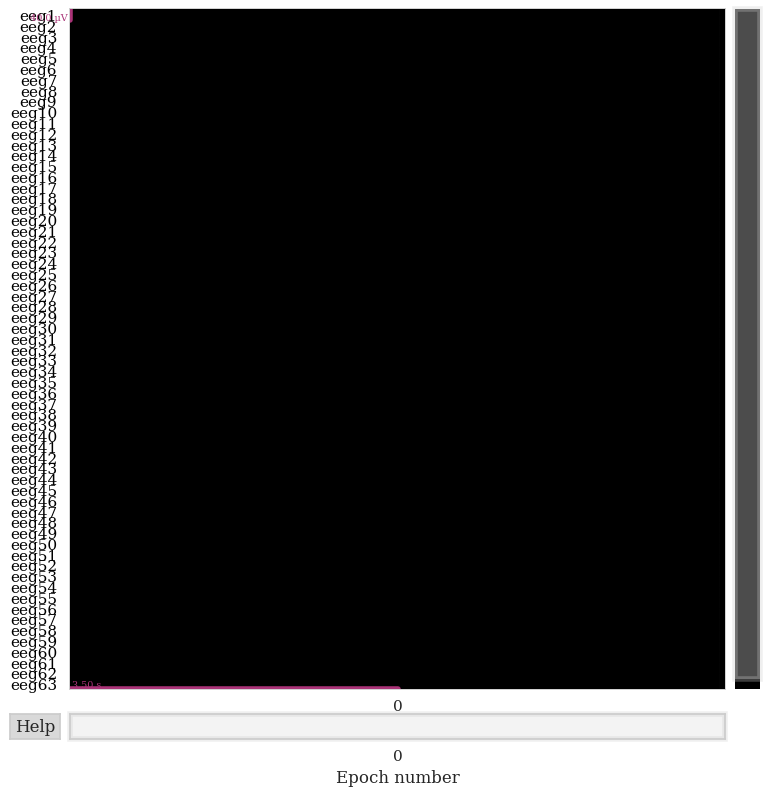

In [ ]:
s1_epoch_left = mne.Epochs(s1_raw[LEFT], s1_events_left, event_id=None, tmin=0, tmax=7, baseline=(0, 0))

s1_epoch_left.plot(n_channels=-1)

Epochs는 잘 안된다. -> 손수 잘라보자.

In [ ]:
mat_file_name = "./GIST_MI/s01.mat"
mat_file = scipy.io.loadmat(mat_file_name)

s1_raw = []
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
s1_raw.append(mne.io.RawArray(mat_file['eeg'][0]['imagery_left'][0][0:n_channels-1, 0:sfreq*7], info=info))
s1_raw.append(mne.io.RawArray(mat_file['eeg'][0]['imagery_right'][0][0:n_channels-1, 0:sfreq*7], info=info))

Creating RawArray with float64 data, n_channels=64, n_times=3584
    Range : 0 ... 3583 =      0.000 ...     6.998 secs
Ready.
Creating RawArray with float64 data, n_channels=64, n_times=3584
    Range : 0 ... 3583 =      0.000 ...     6.998 secs
Ready.


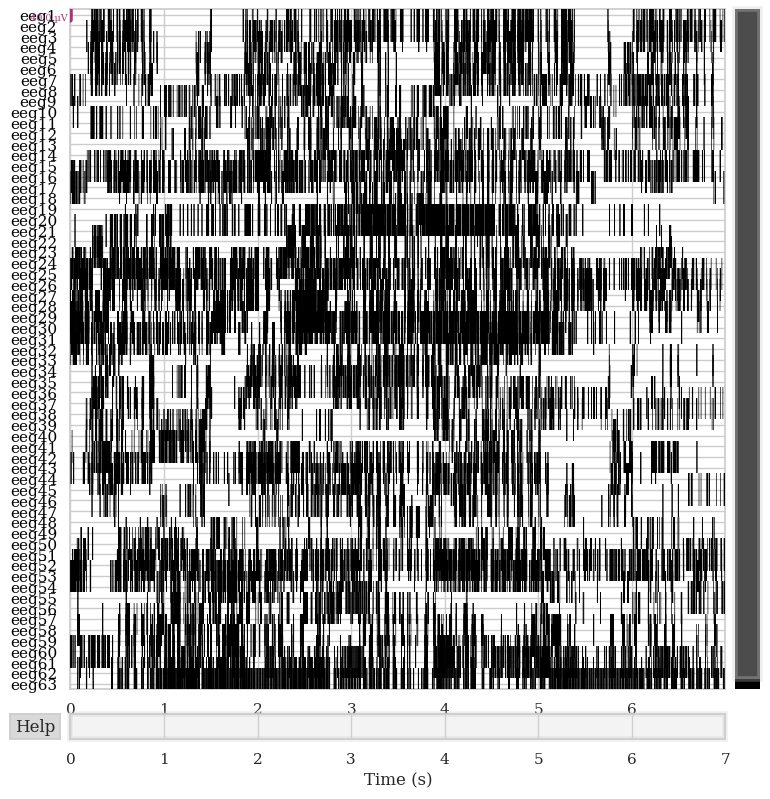

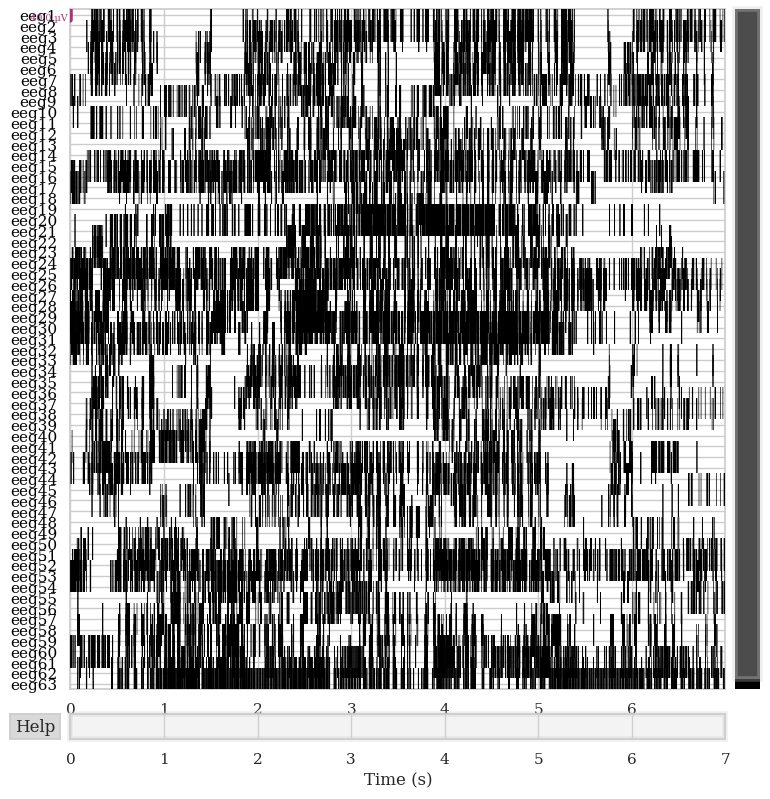

In [ ]:
s1_raw[LEFT].plot(n_channels=-1)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


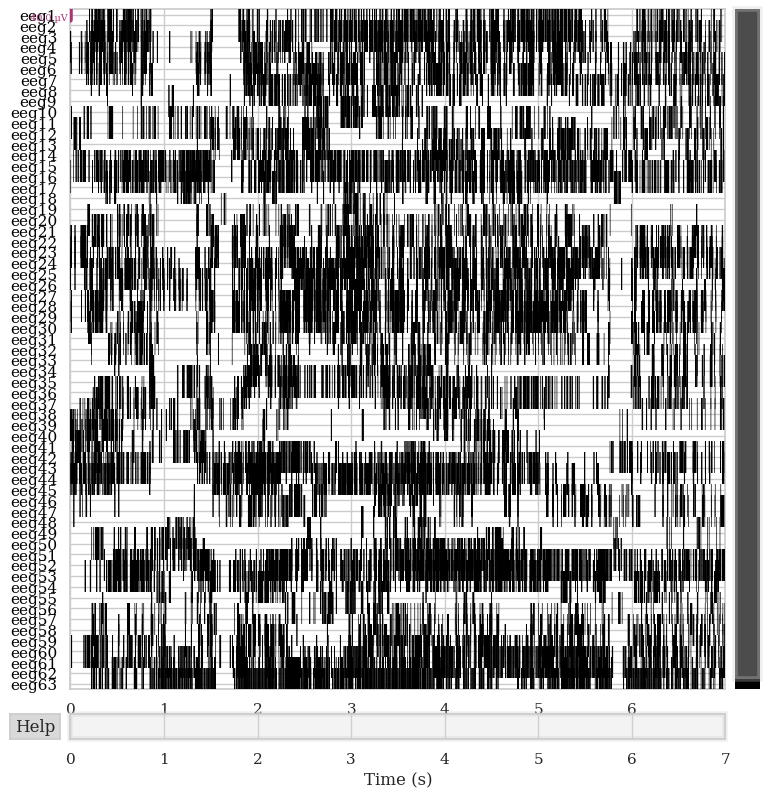

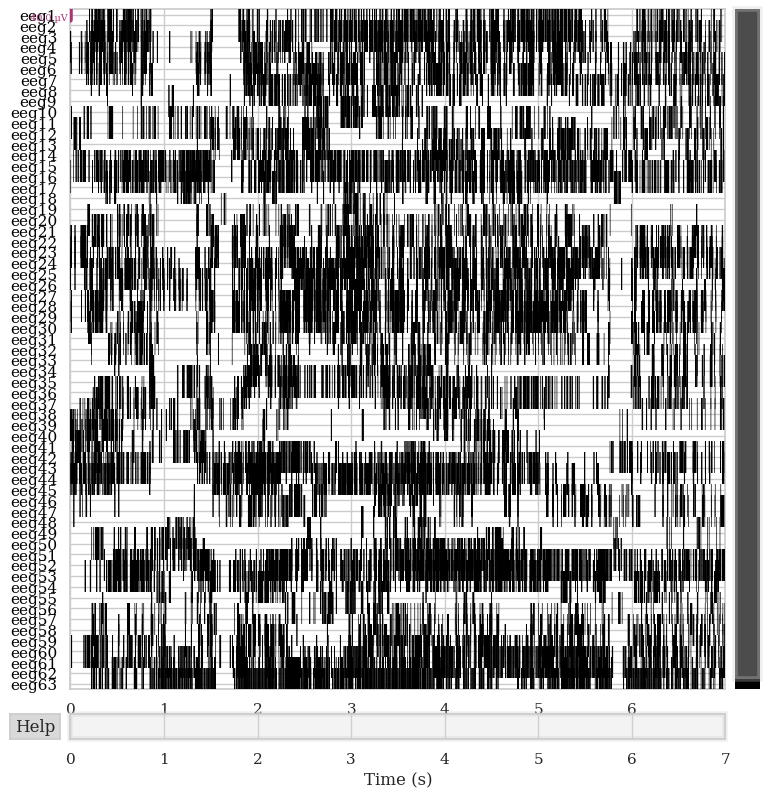

In [ ]:
s1_referenced = []
s1_referenced.append(mne.set_eeg_reference(s1_raw[LEFT])[0])
s1_referenced.append(mne.set_eeg_reference(s1_raw[RIGHT])[0])

s1_referenced[LEFT].plot(n_channels=-1)

* bandpass filtering (8Hz - 13Hz)   



Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 845 samples (1.650 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


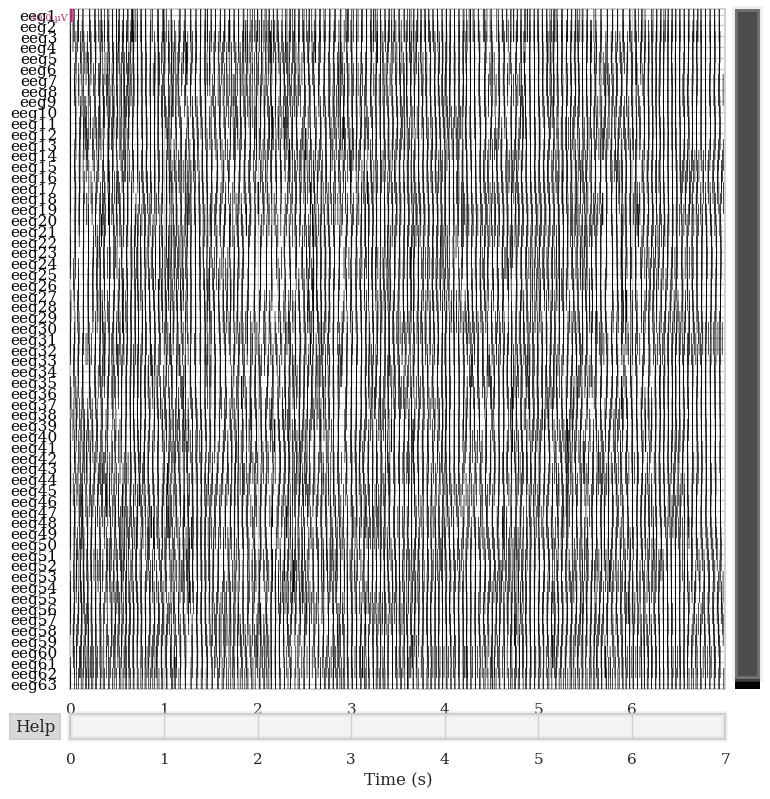

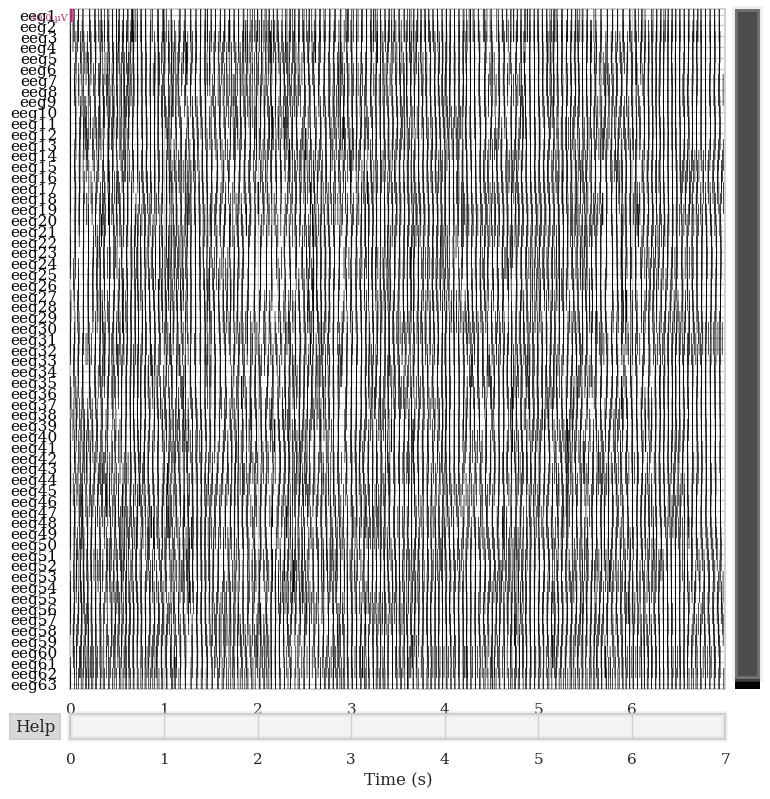

In [ ]:
s1_referenced[LEFT].filter(l_freq=8, h_freq=13)
s1_referenced[RIGHT].filter(l_freq=8, h_freq=13)

s1_referenced[LEFT].plot(n_channels=-1)